In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/philhoonoh/os/blob/main/lecture_summary/02_Chapter3_part2.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Chapter 3
## Processes part2
#### Contents
    - 3.4 Interprocess Communication
    - 3.5 IPC in Shared-Memory Systems
    - 3.6 IPC in Message-Passing Systems
    - 3.7 Examples of IPC Systems
    - 3.8 Communication in Client-Server Systems

## 3.4 Interprocess Communication

### Process
- 동시에 실행되고 있는 프로세스들은 __independent__ 프로세스들이거나 __cooperating__ 프로세스들입니다. 
- __independent__ 프로세스는 다른 프로세스들과 데이터를 공유할 필요가 없습니다. 
- __cooperating__ 프로세스는
    - 다른 프로세스들에 의해 영향을 주거나 영향을 받습니다. 
    - __데이터를 공유__ 하는 프로세스들은 __cooperating__ 프로세스들입니다. 

### IPC (Inter-Process Communication)
- __cooperating process(협력/공유 프로세스)__ 는 _데이터를 주고 받기 위한_ IPC mechanism 이 필요합니다.

### IPC (Inter-Process Communication) Models  
- __Shared Memory__
- __Message Passing__

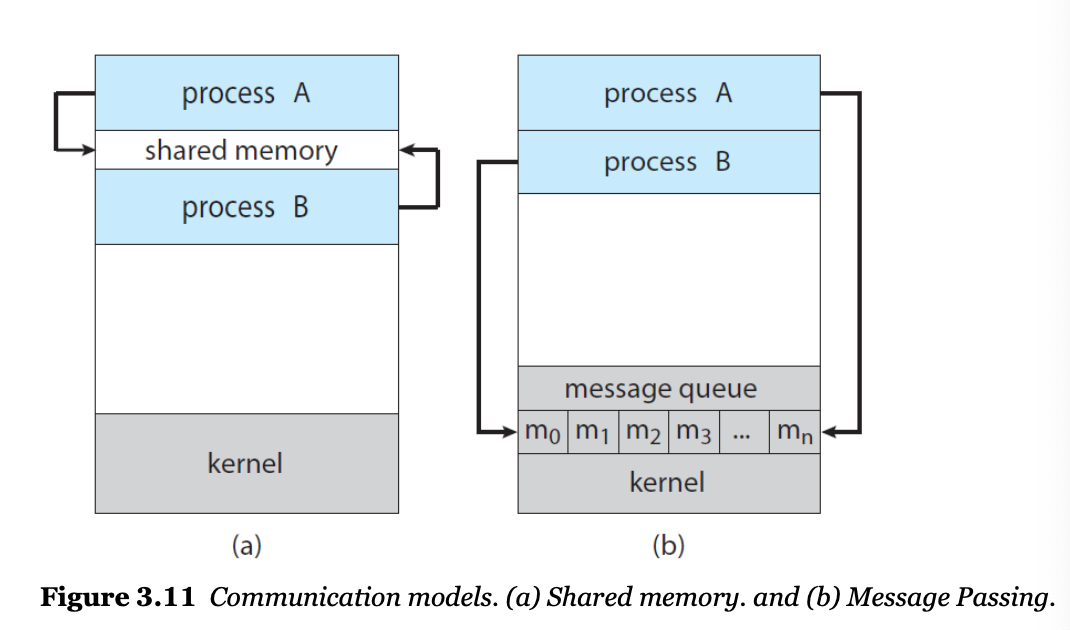

### Producer-Consumer Problem
- cooperating process 의 개념을 설명
- cooperating process 들의 common paradigm
- __producer__ 는 __consumer__ 가 사용하기 위한 정보를 생성
    - 컴파일러가 어셈블리어 코드를 생성, 어셈블리어는 해당 코드를 사용
    - 웹서버는 html 파일을 생성, 브라우저는 해당 파일을 사용

## 3.5 IPC in Shared-Memory Systems

### Shared Memory
- producer, consumer 동시 실행 가능
- __buffer__ 를 생성
    - producer 는 __buffer__ 를 채우고
    - consumer 는 __buffer__ 를 비움
    - __circular queue__ 로 구현
        
- __Shared Memory__ 는 _producer 와 consumer 가 공유_ 하는  메모리의 한 부분

- buffer 정의
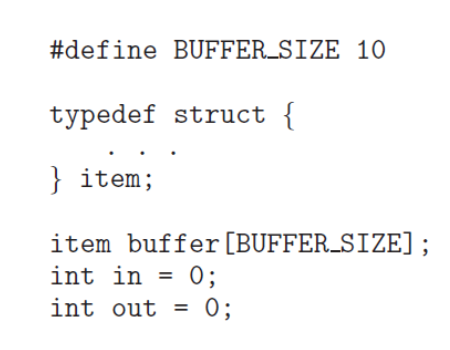

- Producer 의 버퍼 사용
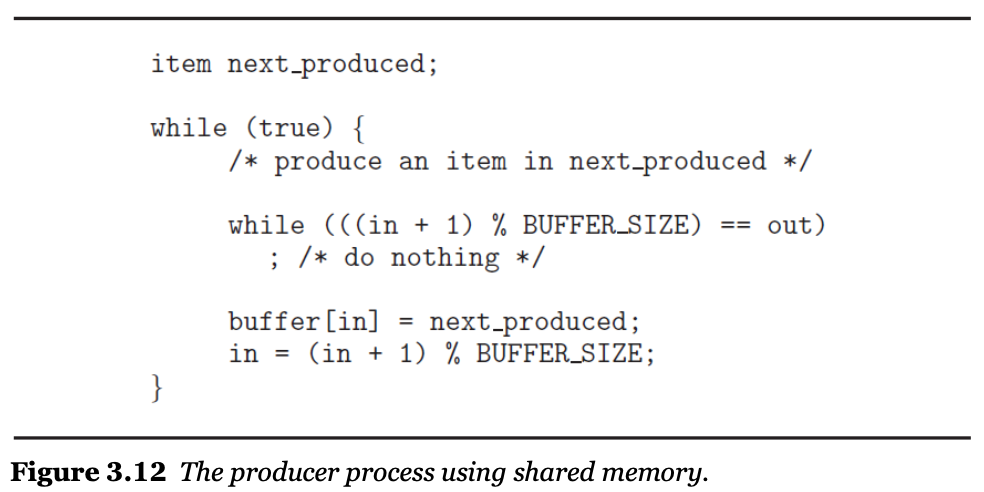

- Consumer 의 버퍼 사용
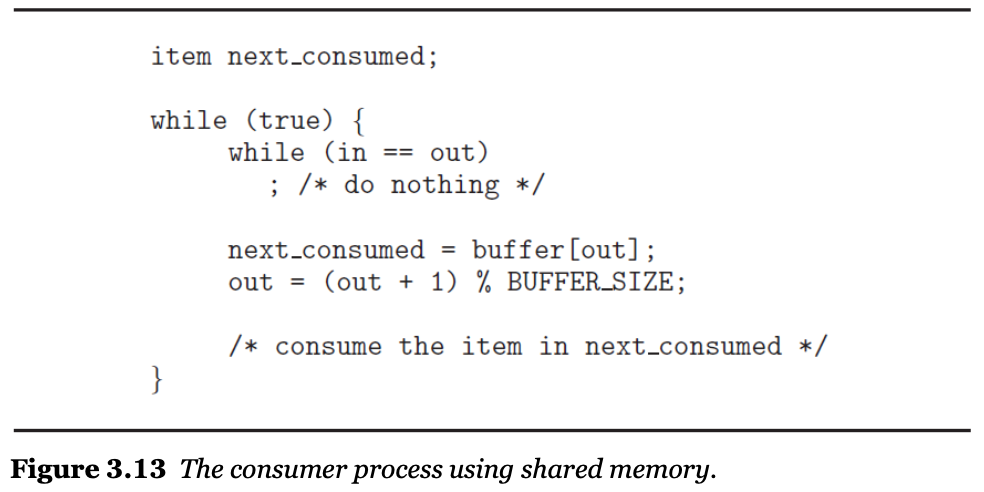

### Shared Memory 한계
- shared memory 를 접근하고 관리해야될 코드들을 프로그래머가 직접 __명시적__ 으로 작성해 주어야 한는 번거로움
- message-passing 방식은 OS 가 제공

## 3.6 IPC in Message-Passing Systems

### Message-Passing
- cooperating process 들을 위해 __OS 가 제공하는 방식__ 
- os 의 system call 로 이루어짐

### Two operations of the message-passing facility
- __send (message)__
- __receive (message)__

- Producer 의 message-passing 
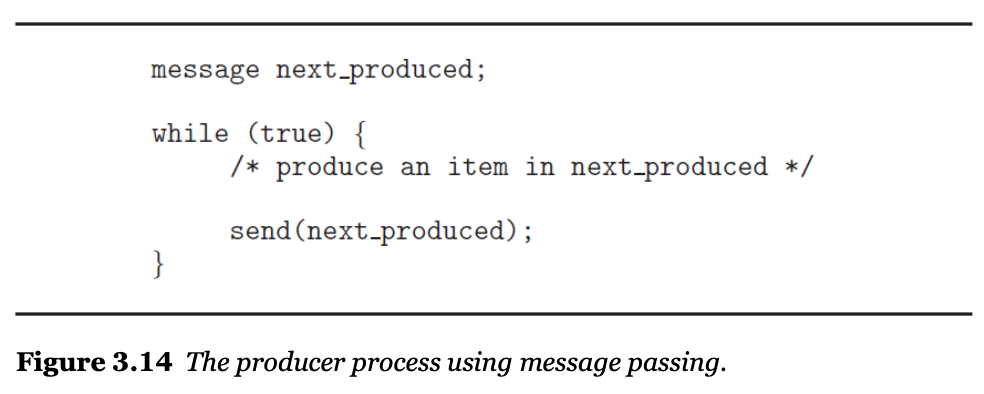

- Consumer 의 message-passing
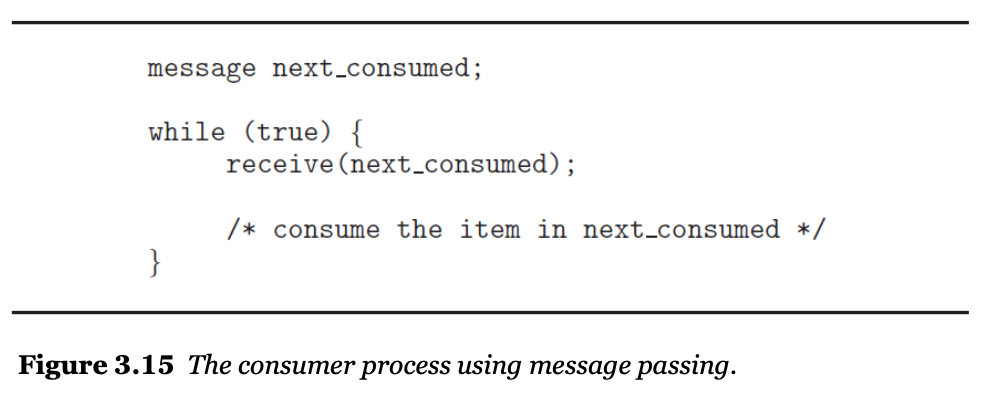

### Communication Links
- P, Q 라는 프로세스들이 통신을 하려면, P,Q 는 서로 메세지를 주고 받을 수 있어야함
- 이를 위한 communication link 의 구현은 다양한 방법이 존재
    - __direct__ or __indirect__ communication.
    - __synchronous__ and __asynchronous__ communication.
    - __automatic__ or __explicit__ buffering.

### Under __direct__ communication 
- 통신을 하는 각 프로세스가 recipent 혹은 sender 를 __명시__ 

- The primitives of this scheme:
    - send(𝑃, message) – send a message to process 𝑃.  
    - receive(𝑄, message) – receive a message from process 𝑄.
    
#### The properties of communication links in this scheme
- 링크가 자동으로 생성  
- 정확히 2개의 프로세스가 링크에 관여 
- 하나의 프로세스 쌍간에 정확히 1개의 링크만 존재 

### With __indirect__ communication
- 메세지들이 __mailboxes__ or __ports__ 에 전송 되거나 수신  
- __mailbox__ (also referred to as __ports__)
    - 추상화된 객체로서 프로세스들에 의해 메세지를 보내거나 받는 저장소 
    
- The primitives of this scheme:
    - send(𝐴, message) – send a message to mailbox 𝐴.  
    - receive(𝐴, message) – receive a message from mailbox 𝐴.
    
#### The properties of communication links in this scheme:
- 두개의 프로세스가 mailbox 를 공유할 때에만 해당 프로세스 쌍 간의 링크가 생성 
- 해당 링크는 2개 이상의 프로세스들과 연결 가능
- 각 프로세스 쌍들간에 다양한 링크들이 존재 가능
- 하나의 링크에는 하나의 메일 박스 

### OS provides a mechanism that allows a process to do
- __CREATE__ : 새로운 mailbox 생성 
- __SEND/RECEIVE__ : mailbox를 통한 메세지 전송/송신 
- __DELETE__ : mailbox 삭제 

### Different design options for implementation
- __blocking__ or __non-blocking__ = __synchronous__ or __asynchronous__

- __Blocking send__
    - sender process 가 메세지를 보낸후 (답변)메세지를 받기 전까지 process blcok
    - The sending process is blocked until the message is received by the receiving process or by the mailbox.

- __Non-blocking send__
    - sender process 가 메세지를 보낸후에도 process 실행
    - The sending process sends the message and resumes operation.
    
- __Blocking receive__
    - reciever process 가 메세지를 생성할때까지 process block
    - The receiver blocks until a message is available.

- __Non-blocking receive__
    - reciever process 가 null 값이나 유효값 메시지 반환
    - The receiver retrieves either a valid message or a null.
    

## 3.7 Examples of IPC Systems

- Shared Memonry : __POSIX Shared Memory__
    - POSIX( Portable Operating System Interface (for uniX) ) 

- Message Passing : __Pipes__
    - 초기 UNIX 시스템의 IPC mecahnisms 중 하나

### POSIX Shared Memory
- __memory-mapped files__ 사용
    - shared memory file 를 memory 에 mapping 하여 사용
    
1. First, create a shared-memory object:
    - fd = shm_open(name, O_CREAT | ORDWR, 0666);
2. Configure the size of the object in bytes:
    - ftruncate(fd, 4096);
3. Finally, establish a memory-mapped file:
    - mmap(0, SIZE, PROT_READ | PROT_WRITE, MAP_SHARED, fd, 0);

- Producer process illustrating POSIX shared-memory API

```c
#include <stdio.h> 
#include <stdlib.h> 
#include <string.h> 
#include <fcntl.h> 
#include <sys/shm.h> 
#include <sys/stat.h> 
#include <sys/mman.h>

int main() {
    const int SIZE = 4096;     // the size of shared memory
    const char *name = "OS";     // the name of shared memory
    const char *message_0 = "Hello, ";
    const char *message_1 = "Shared Memory!\n";
    
    int shm_fd;     // the file descriptor of shared memory
    char *ptr;      // pointer to shared memory
    
    /* create the shared memory object */
    shm_fd = shm_open(name, O_CREAT | O_RDWR, 0666); 
    
    /* configure the size of the shared memory */
    ftruncate(shm_fd, SIZE);
    
    /* map the shared memory object */
    ptr = (char *)mmap(0, SIZE, PROT_READ | PROT_WRITE, MAP_SHARED, shm_fd, 0);
    
    /* write to the shared memory */
    sprintf(ptr, "%s", message_0); 
    ptr += strlen(message_0); 
    sprintf(ptr, "%s", message_1); 
    ptr += strlen(message_1);
    
    return 0;
}
```

- Consumer process illustrating POSIX shared-memory API

```c
#include <stdio.h> 
#include <stdlib.h> 
#include <fcntl.h> 
#include <sys/shm.h> 
#include <sys/stat.h> 
#include <sys/mman.h>

int main() {
    const int SIZE = 4096;     // the size of shared memory
    const char *name = "OS";     // the name of shared memory
    
    int shm_fd;     // the file descriptor of shared memory
    char *ptr;      // pointer to shared memory
    
    /* create the shared memory object */
    shm_fd = shm_open(name, O_RDONLY, 0666);  
    
    /* map the shared memory object */
    ptr = (char *)mmap(0, SIZE, PROT_READ | PROT_WRITE, MAP_SHARED, shm_fd, 0);
    
    /* read from the shared memory object */ 
    printf("%s", (char *)ptr);
    
    /* remove the shared memory */
    shm_unlink(name);
    
    return 0;
}
```

### Pipes
- 초기 UNIX 시스템의 IPC mecahnisms 중 하나
- 두개의 프로세스들이 통신 할수 있도록 하는 도관(파이프)  
  
  
- 구현에 있어 4가지 이슈
    1. Does the pipe allow unidirectional or bidirectional communication?   
        __unidirectional__ : 파이프는 한번에 단방향 통신만 가능  
        
    2. In the case of two-way comm., is it half-duplex or full-duplex?  
        __full-duplex(전이중 통신)__ : pipe 를 2개 만들면 됨
        - half-duplex(반이중 통신)
            - 두 디바이스 간 통신선이 하나
            - 한쪽 디바이스에서 송신과 수신 모두 가능
            - 통신선이 하나이므로 송신과 수신을 동시에 할 수 없다.
            - 한쪽이 송신 시 다른 쪽에서는 수신만 가능
        - full-duplex(전이중 통신) 
            - 두 디바이스간 통신선이 두 개(송신선, 수신선)
            - 송신선과 수신선선이 각각 존재하므로 데이터 송신과 동시에 수신이 가능  
        
    3. Must a relationship exist between the communicating process?  
        __Yes Parent Child__ : 경우에 따라서 pipe 는 편의상 부모 자식 관계가 필요  
        
    4. Can the pipes communicate over a network?  
        __No__ : network 상에서는 socket 사용

### Two common types of Pipes

- __Ordinary pipes__
    - 파이프를 생성한 프로세스 밖에서 접근할 수 없음
    - 일반적으로 부모 프로세스가 파이프를 생성하여 자식 프로세스와 통신하기 위해 사용

- __Named pipes__
    - 부모 자식 관계가 필요 없음 (파이프를 이름으로 관리) 

### __Ordinary pipes__
- producer-consumer 방식으로 프로세스들간의 통신을 가능하게 함
    - the producer writes to one end of the pipe (write end)
    - the consumer reads from the other end (read end)
- 단방향 (unidirectional)
    - 단방향 통신만 가능
- 양방향 통신 (two-way communication) 은?
    - 파이프 2개 사용!
- Ordinary pipes 함수
    - pipe(int fd[])
    - fd[0]: the read end of the pipe
    - fd[1]: the write end


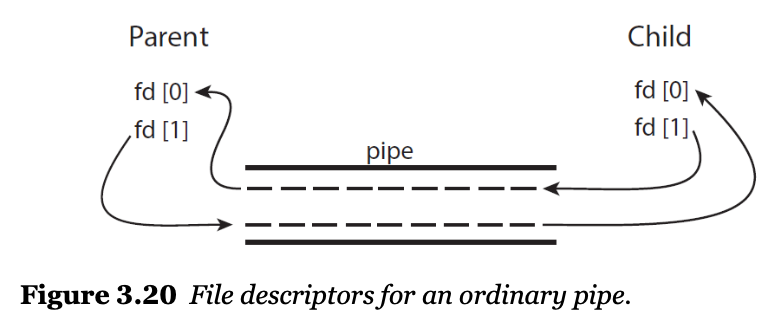

* Ordinary pipe in UNIX

```c
#include <stdio.h>
#include <string.h>
#include <unistd.h>
#include <sys/types.h>

#define BUFFER_SIZE 25 
#define READ_END 0 
#define WRITE_END 1

int main() 
{
    char write_msg[BUFFER_SIZE] = "Greetings";
    char read_msg[BUFFER_SIZE];
    int fd[2];
    pid_t pid;
    
    /* create the pipe */
    pipe(fd);
    
    pid = fork();  // fork a new process
    
    if (pid > 0) { // parent process
        close(fd[READ_END]);
        /* write to the pipe */
        write(fd[WRITE_END], write_msg, strlen(write_msg) + 1); 
        close(fd[WRITE_END]);
    }
    else if (pid == 0) { // child process 
        close(fd[WRITE_END]);
        /* read to the pipe */
        read(fd[READ_END], read_msg, BUFFER_SIZE); 
        printf("read %s\n", read_msg); 
        close(fd[READ_END]);
    }
    return 0;
}
```

## 3.8 Communication in Client-Server Systems

### Two other strategies in client-server systems
- __Sockets__
    - are defined as __endpoints (IP + Port)__ for communication.
- __RPCs (Remote Procedure Calls)__
    - 원격 함수 호출
    - 네트워크 시스템 상에서의 프로세스들 간(원격) 함수 호출을 추상화
    - abstracts procedure calls between processes on networked systems.

### __Sockets__
    - identified by an IP address concatenated with a port number.
    
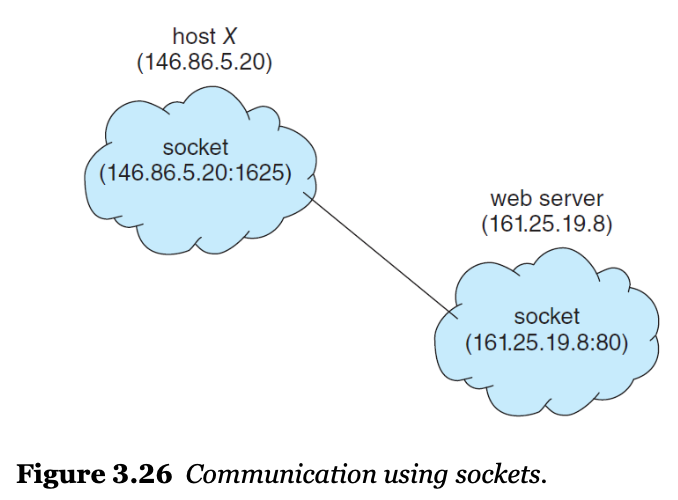

- Java 
    - socket programming 을 배울시 자바를 많이 사용
        - 쉬운 socket interface 제공
        - 3가지 타입의 socket을 제공
            - __Socket__ class, __ServerSocket__ class : __connection-oriented(TCP)__
            - __DatagramSocket__ class : __connectionless(UDP)__ -> 방송(broadcasting)
            - __MulticastSocket__ class: multiple recipients -> 특정한 recipient 에게만 방송(broadcasting)

* Date server in Java.  

```java
import java.net.*; 
import java.io.*;

public class DateServer {
    public static void main(String[] args) throws Exception {
        ServerSocket server = new ServerSocket(6013);
        
        /* Now listen for connections */
        while (true) {
            Socket client = server.accept();
            PrintWriter pout = new PrintWriter(client.getOutputStream(), true);
            
            /* write the Date to the socket */
            pout.println(new java.util.Date().toString());
            
            /* close the socket and resume listening for connections */
            client.close();
        }
    }
}
```

* Date client in Java.  

```java
import java.net.*; 
import java.io.*;

public class DateServer {
    public static void main(String[] args) throws Exception {
        /* make connection to server socket */
        Socket socket = new Socket("127.0.0.1", 6013);
        
        InputStream in = socket.getInputStream();
        BufferedReader br = new BufferedReader(new InputStreamReader(in));
        
        /* read date from the socket */
        String line = null;
        while ((line = br.readLine()) != null)
            System.out.println(line);
        
        /* close the socket connections */
        socket.close();
    }
}
```

### RPC (Remote Procedure Call)
- RPC는 임의의 함수를 네트워크 어디에서나 그대로 사용하게 하는 기술
- 네트워크 시스템 상에서의 프로세스들 간(원격) 함수 호출을 추상화  
- 원격 서비스에서 가장 흔한 형태  
- 다양한 이름이 있음
    - Java 에서는 RMI (Remote Method Invocation)
    - MS 에서는 COM (Component Object Model) 
    
    
- one of the most common forms of remote service.
- designed as a way to abstract the procedure-call mechanism
    - for use between systems with network connections.
- A client invokes a procedure on a remote host
    - as it would invoke a procedure locally.

#### The RPC system

- Component
    - IDL (Interface Description Language)
        - 서로 다른 주소/언어/환경을 가진 애플리케이션들의 통신을 위해 도입된 별도의 언어
        - 초기에는 XML, JSON 많이 쓰임
        - 구글의 gRPC는 자체적으로 만든 ProtoBuffer를 사용

    - RPC Compiler
        - 타 언어 - IDL 간 번역을 지원하는 프로그램
        - IDL을 사용해 함수를 작성한 뒤 RPC 컴파일러를 실행시키면 그 결과로 서버/클라이언트 소스코드가 생성
        - 메시지 포맷, RPC 함수, 그리고 이들에 접근할 수 있게 해 주는 객체인 Stub
        -  RPC 컴파일러에 의해 각 환경에 맞는 언어로 변환된 Stub 객체를 통해 코드 단에서 직접 접근해 사용
        - Server Stub은 서버 쪽 컴퓨터에, Client Stub은 클라이언트 쪽 컴퓨터에 심어준 뒤 RPC 함수를 마치 로컬에서 쓰는 것처럼 사용  

- Terms 
    - 직렬화(Serialization)
        - 객체 데이터를 일련의 byte stream으로 변환하는 작업을 직렬화
        - 반대로 일련의 byte stream을 본래의 객체 모양으로 복원하는 작업은 Deserialization
    - 마샬링(Marshalling)
        - 메모리 상에 형상화된 객체 데이터를 적당한 다른 데이터 형태로 변환하는 과정
        - 컴퓨터간 데이터 전달 또는 프로그램 간 데이터 전달을 할 때 사용
        - 전송된 데이터를 다시 원래의 객체 모양으로 복원하는 작업은 언마샬링(Unmarshalling)
    - 직렬화와 마샬링의 차이
        - 직렬화 작업을 컴퓨터 프로그래밍 데이터 처리에 적용한 개념이 마샬링  
        
     
- hides the details that allow communication to take place
    - by providing a __stub__ on the client side.
- The stub of client-side locates the server and
    - __marshals__ the parameters.
- The stub of server-side received this message,
    - unpacks the marshalled parameters,and 
    - performs the procedure on the server.
    
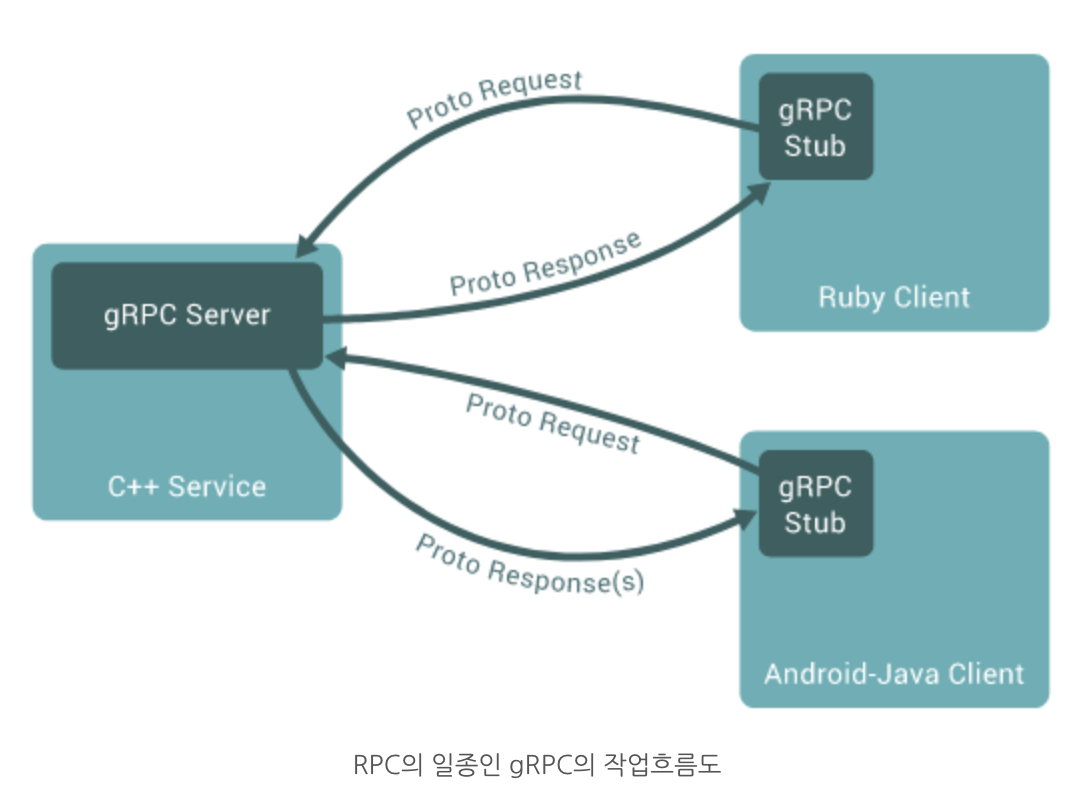